In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
plt.rcParams["font.family"] = "Arial"  # Set global font to Arial

df = pd.read_csv("MOL_surface_adsorption_250427.csv", delimiter = ',')
unique_acid = df["Acid"].unique()

c:\Users\yibin jiang\Documents\anaconda\envs\pymc_env\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


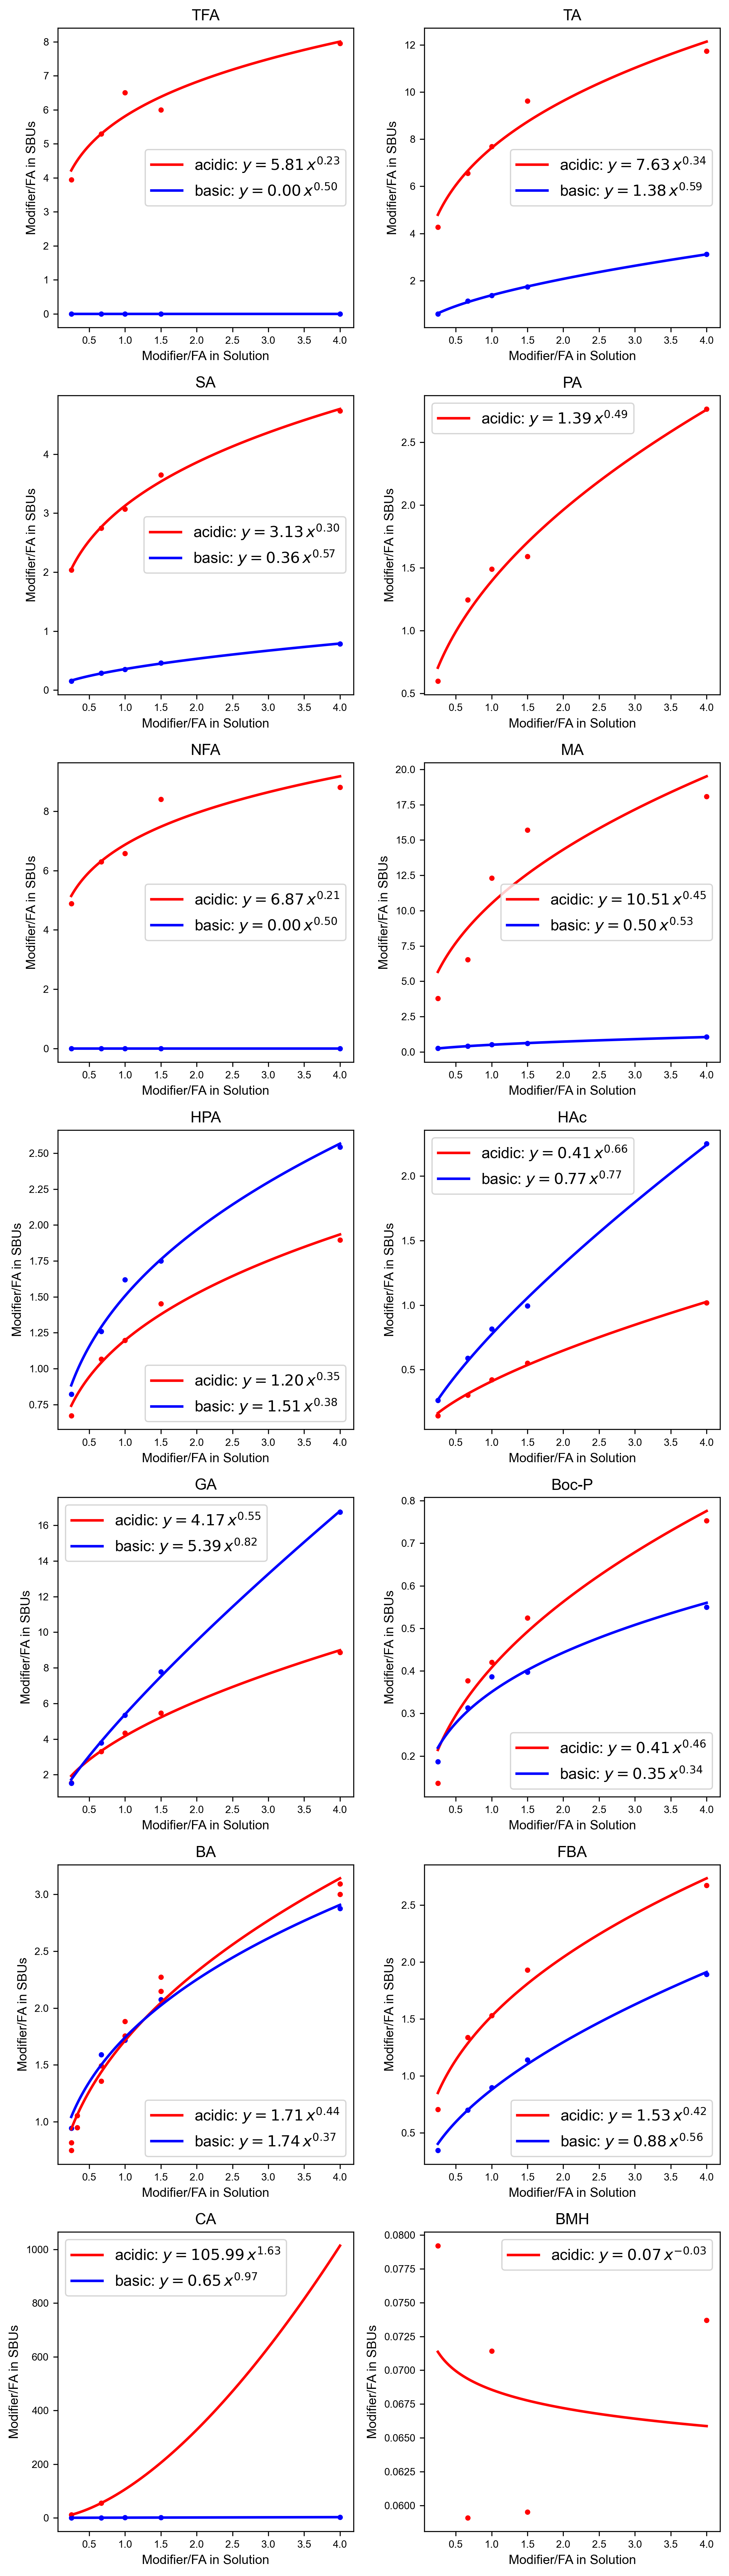

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# --- Fitting functions ---
def adsorption_ratio(x, n, k):
    x = np.asarray(x, dtype=float)
    return (k * (x**n))

def fit_adsorption_ratio(xdata, ydata, p0=(0.5, 1.0)):
    x = np.asarray(xdata, dtype=float)
    y = np.asarray(ydata, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        raise ValueError("Not enough finite points to perform the fit.")
    popt, pcov = curve_fit(adsorption_ratio, x[mask], y[mask], p0=p0, maxfev=5000)
    return popt, pcov

# --- New version with superscript in the legend ---
summary = []
color = ["red", "blue"]

n_cols = 2
n_rows = int(np.ceil(len(unique_acid) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows), dpi=300)
axes = axes.flatten()

for idx, acid_temp in enumerate(unique_acid):
    df_by_acid = df.loc[df["Acid"] == acid_temp]
    ax = axes[idx]
    ax.set_title(acid_temp)
    count = 0 
    
    for experiment_type in df_by_acid["Experiment"].unique():
        try:
            this_curve = df_by_acid.loc[df_by_acid["Experiment"] == experiment_type]
            x = this_curve["Acid conc (mM)"] / this_curve["FA conc (mM)"]
            y = this_curve["acid/SBU"] / this_curve["FA/SBU"]
            
            popt = fit_adsorption_ratio(x.values, y.values)[0]
            
            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = adsorption_ratio(x_fit, *popt)
            
            # Format the equation with real superscript using MathText
            n_fit, k_fit = popt
            equation_str = f"$y = {k_fit:.2f} \\, x^{{{n_fit:.2f}}}$"

            # Plot
            ax.plot(x_fit, y_fit, linewidth=2, 
                    label=f"{experiment_type}: {equation_str}", 
                    c=color[count % len(color)])
            ax.scatter(x, y, color=color[count % len(color)], s=10)
            count += 1
        except Exception as e:
            print(f"Error with {acid_temp}, {experiment_type}: {e}")
            count += 1

    ax.set_xlabel('Modifier/FA in Solution')
    ax.set_ylabel('Modifier/FA in SBUs')
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for i in range(len(unique_acid), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


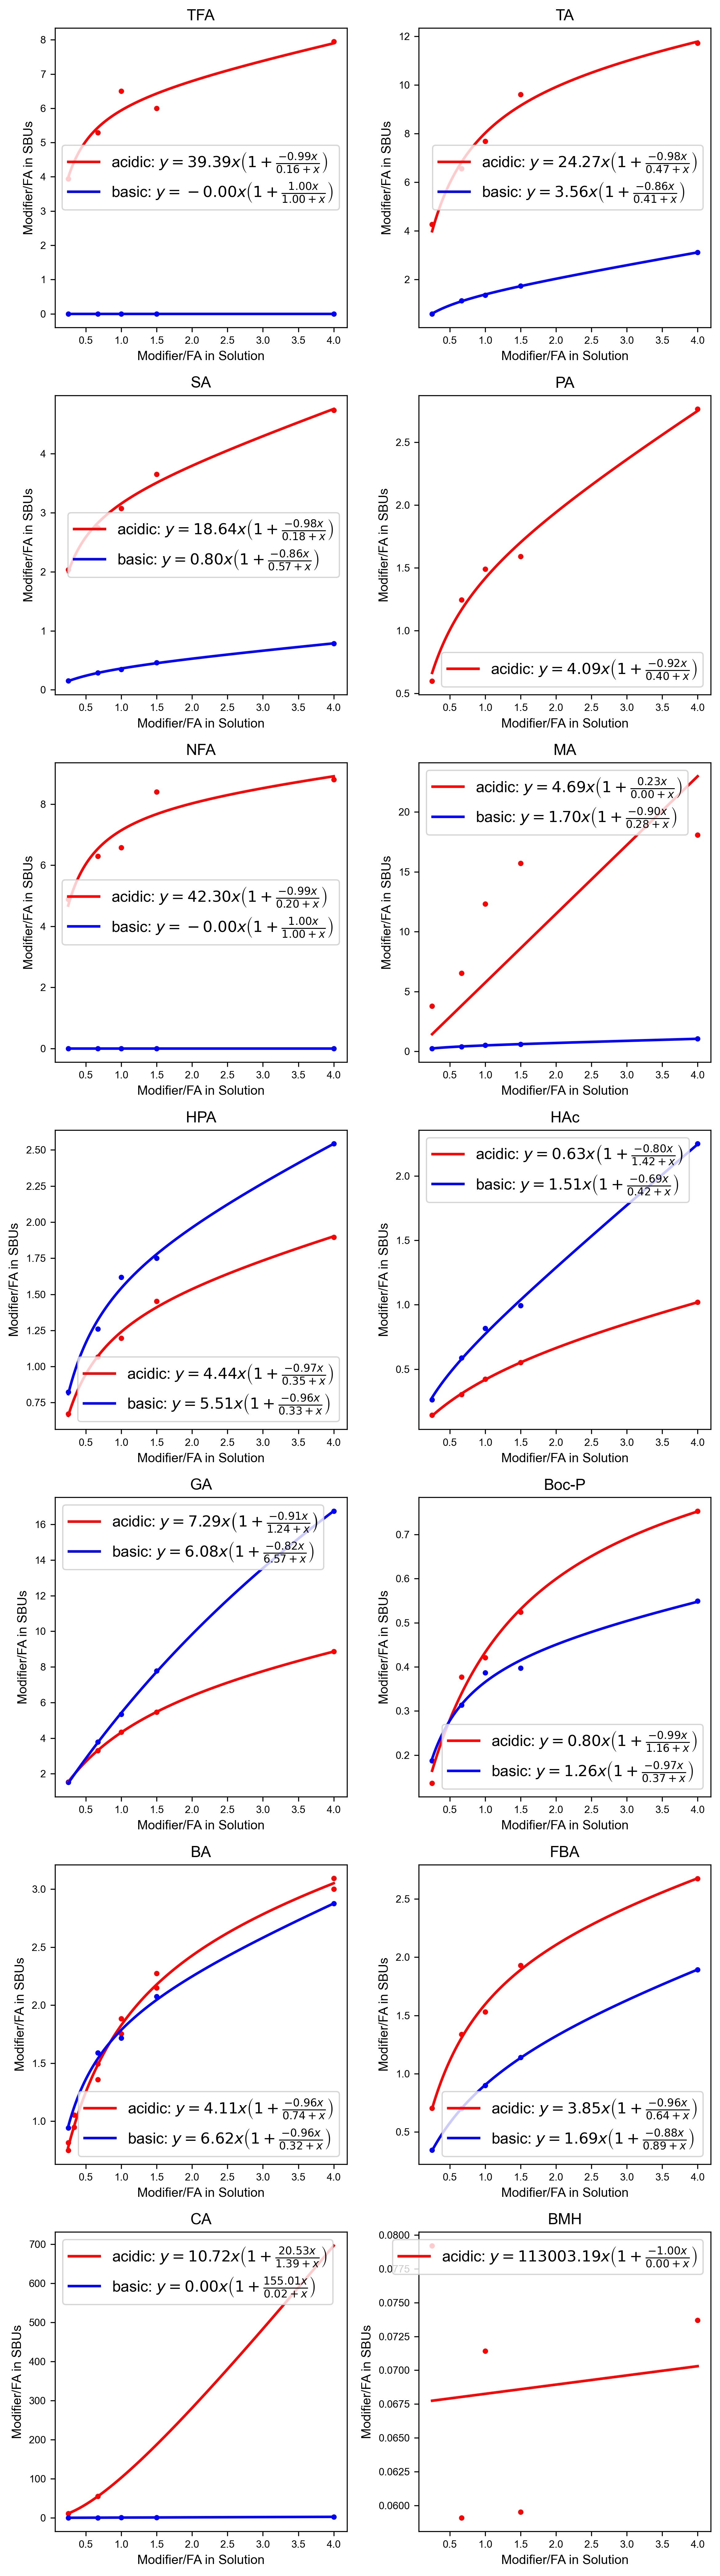

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# --- New fitting function ---
def adsorption_ratio(x, k, beta, alpha):
    x = np.asarray(x, dtype=float)
    return k * x * (1 + (beta * x) / (alpha + x))

def fit_adsorption_ratio(xdata, ydata, p0=(1.0, 1.0, 1.0)):
    x = np.asarray(xdata, dtype=float)
    y = np.asarray(ydata, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        raise ValueError("Not enough finite points to perform the fit.")
    
    # Add bounds:
    # k, beta: can be any real number
    # alpha: must be >= 0
    popt, pcov = curve_fit(
        adsorption_ratio,
        x[mask],
        y[mask],
        p0=p0,
        bounds=([-np.inf, -np.inf, 0], [np.inf, np.inf, np.inf]),
        maxfev=5000
    )
    return popt, pcov

# --- Plotting ---
summary = []
color = ["red", "blue"]

n_cols = 2
n_rows = int(np.ceil(len(unique_acid) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows), dpi=300)
axes = axes.flatten()

for idx, acid_temp in enumerate(unique_acid):
    df_by_acid = df.loc[df["Acid"] == acid_temp]
    ax = axes[idx]
    ax.set_title(acid_temp)
    count = 0 
    
    for experiment_type in df_by_acid["Experiment"].unique():
        try:
            this_curve = df_by_acid.loc[df_by_acid["Experiment"] == experiment_type]
            x = this_curve["Acid conc (mM)"] / this_curve["FA conc (mM)"]
            y = this_curve["acid/SBU"] / this_curve["FA/SBU"]
            
            popt = fit_adsorption_ratio(x.values, y.values)[0]
            
            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = adsorption_ratio(x_fit, *popt)
            
            # Format the new equation nicely for the legend
            k_fit, beta_fit, alpha_fit = popt
            equation_str = (
                f"$y = {k_fit:.2f}x\\left(1 + \\frac{{{beta_fit:.2f}x}}{{{alpha_fit:.2f}+x}}\\right)$"
            )

            # Plot
            ax.plot(x_fit, y_fit, linewidth=2, 
                    label=f"{experiment_type}: {equation_str}", 
                    c=color[count % len(color)])
            ax.scatter(x, y, color=color[count % len(color)], s=10)
            count += 1
        except Exception as e:
            print(f"Error with {acid_temp}, {experiment_type}: {e}")
            count += 1

    ax.set_xlabel('Modifier/FA in Solution')
    ax.set_ylabel('Modifier/FA in SBUs')
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for i in range(len(unique_acid), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


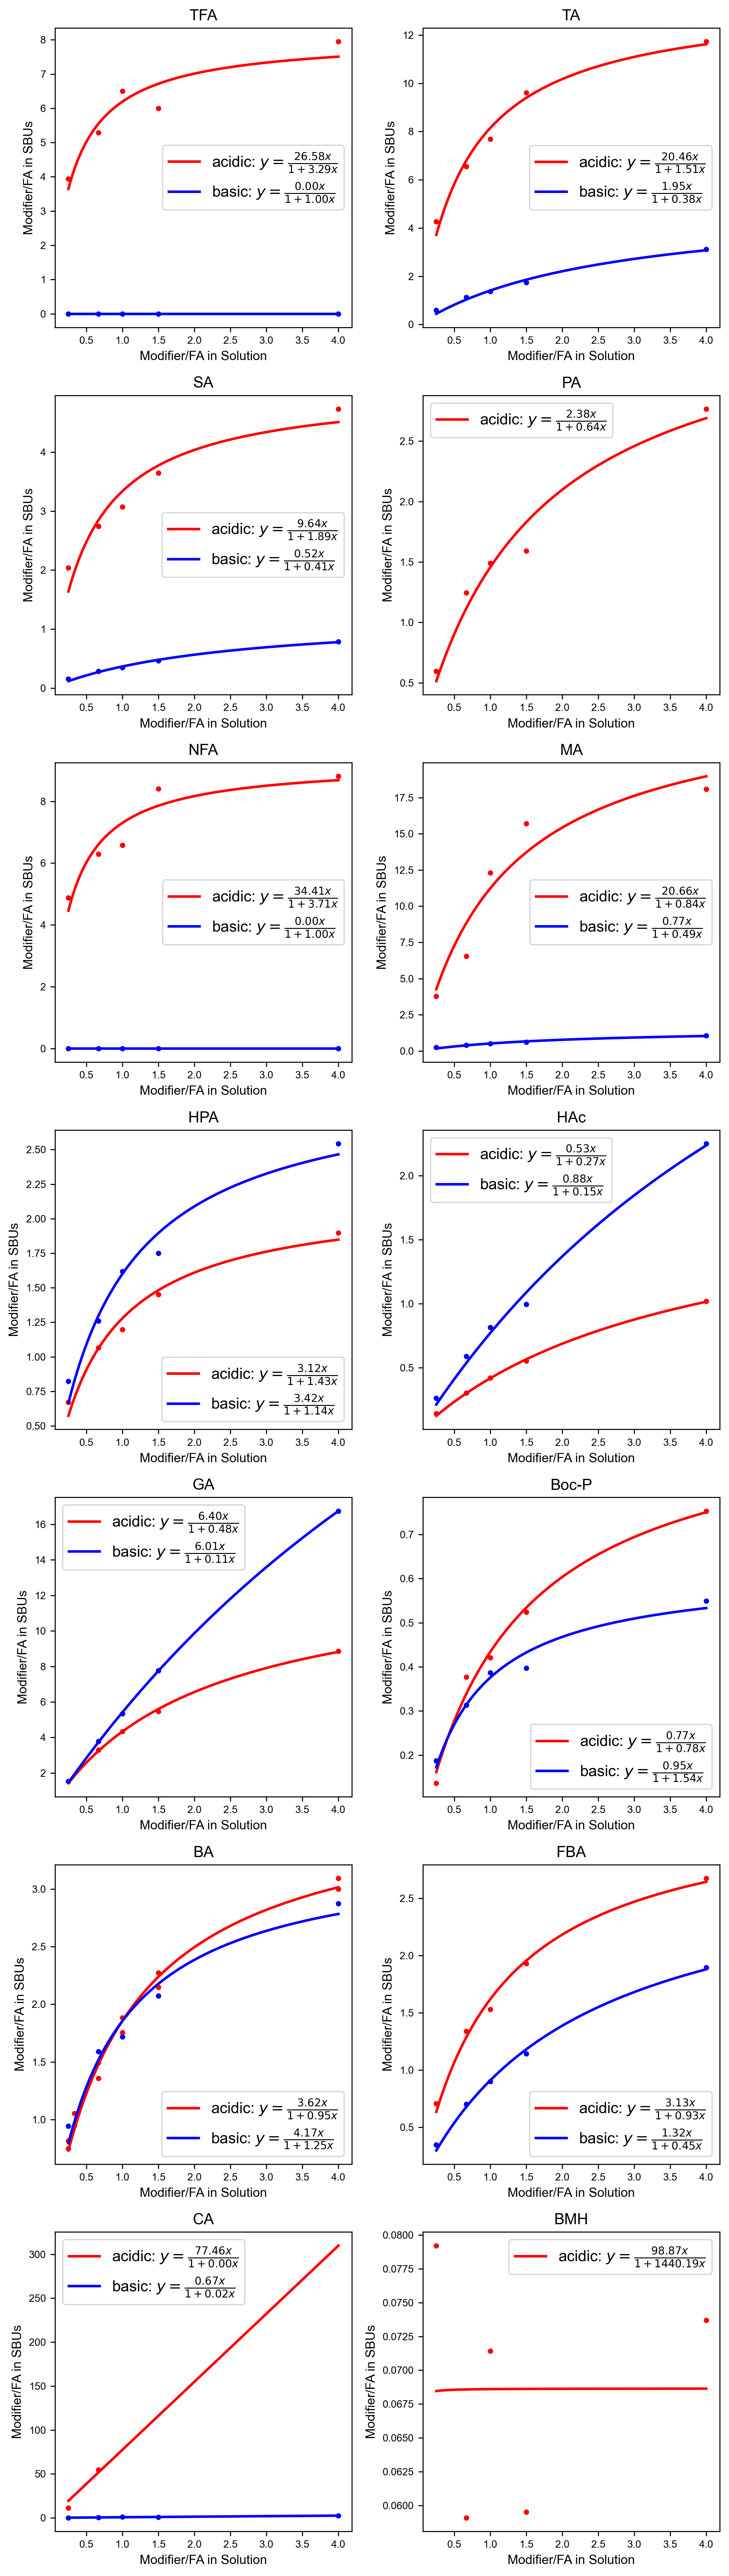

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# --- New fitting function ---
def adsorption_ratio(x, K, alpha):
    x = np.asarray(x, dtype=float)
    return (K * x) / (1 + alpha * x)

def fit_adsorption_ratio(xdata, ydata, p0=(1.0, 1.0)):
    x = np.asarray(xdata, dtype=float)
    y = np.asarray(ydata, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        raise ValueError("Not enough finite points to perform the fit.")
    
    # Bounds: K free, alpha >= 0
    popt, pcov = curve_fit(
        adsorption_ratio,
        x[mask],
        y[mask],
        p0=p0,
        bounds=([-np.inf, 0], [np.inf, np.inf]),
        maxfev=5000
    )
    return popt, pcov

# --- Plotting ---
summary = []
color = ["red", "blue"]

n_cols = 2
n_rows = int(np.ceil(len(unique_acid) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows), dpi=300)
axes = axes.flatten()

for idx, acid_temp in enumerate(unique_acid):
    df_by_acid = df.loc[df["Acid"] == acid_temp]
    ax = axes[idx]
    ax.set_title(acid_temp)
    count = 0 
    
    for experiment_type in df_by_acid["Experiment"].unique():
        try:
            this_curve = df_by_acid.loc[df_by_acid["Experiment"] == experiment_type]
            x = this_curve["Acid conc (mM)"] / this_curve["FA conc (mM)"]
            y = this_curve["acid/SBU"] / this_curve["FA/SBU"]
            
            popt = fit_adsorption_ratio(x.values, y.values)[0]
            
            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = adsorption_ratio(x_fit, *popt)
            
            # Format the new equation for the legend
            K_fit, alpha_fit = popt
            equation_str = (
                f"$y = \\frac{{{K_fit:.2f}x}}{{1+{alpha_fit:.2f}x}}$"
            )

            # Plot
            ax.plot(x_fit, y_fit, linewidth=2, 
                    label=f"{experiment_type}: {equation_str}", 
                    c=color[count % len(color)])
            ax.scatter(x, y, color=color[count % len(color)], s=10)
            count += 1
        except Exception as e:
            print(f"Error with {acid_temp}, {experiment_type}: {e}")
            count += 1

    ax.set_xlabel('Modifier/FA in Solution')
    ax.set_ylabel('Modifier/FA in SBUs')
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for i in range(len(unique_acid), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


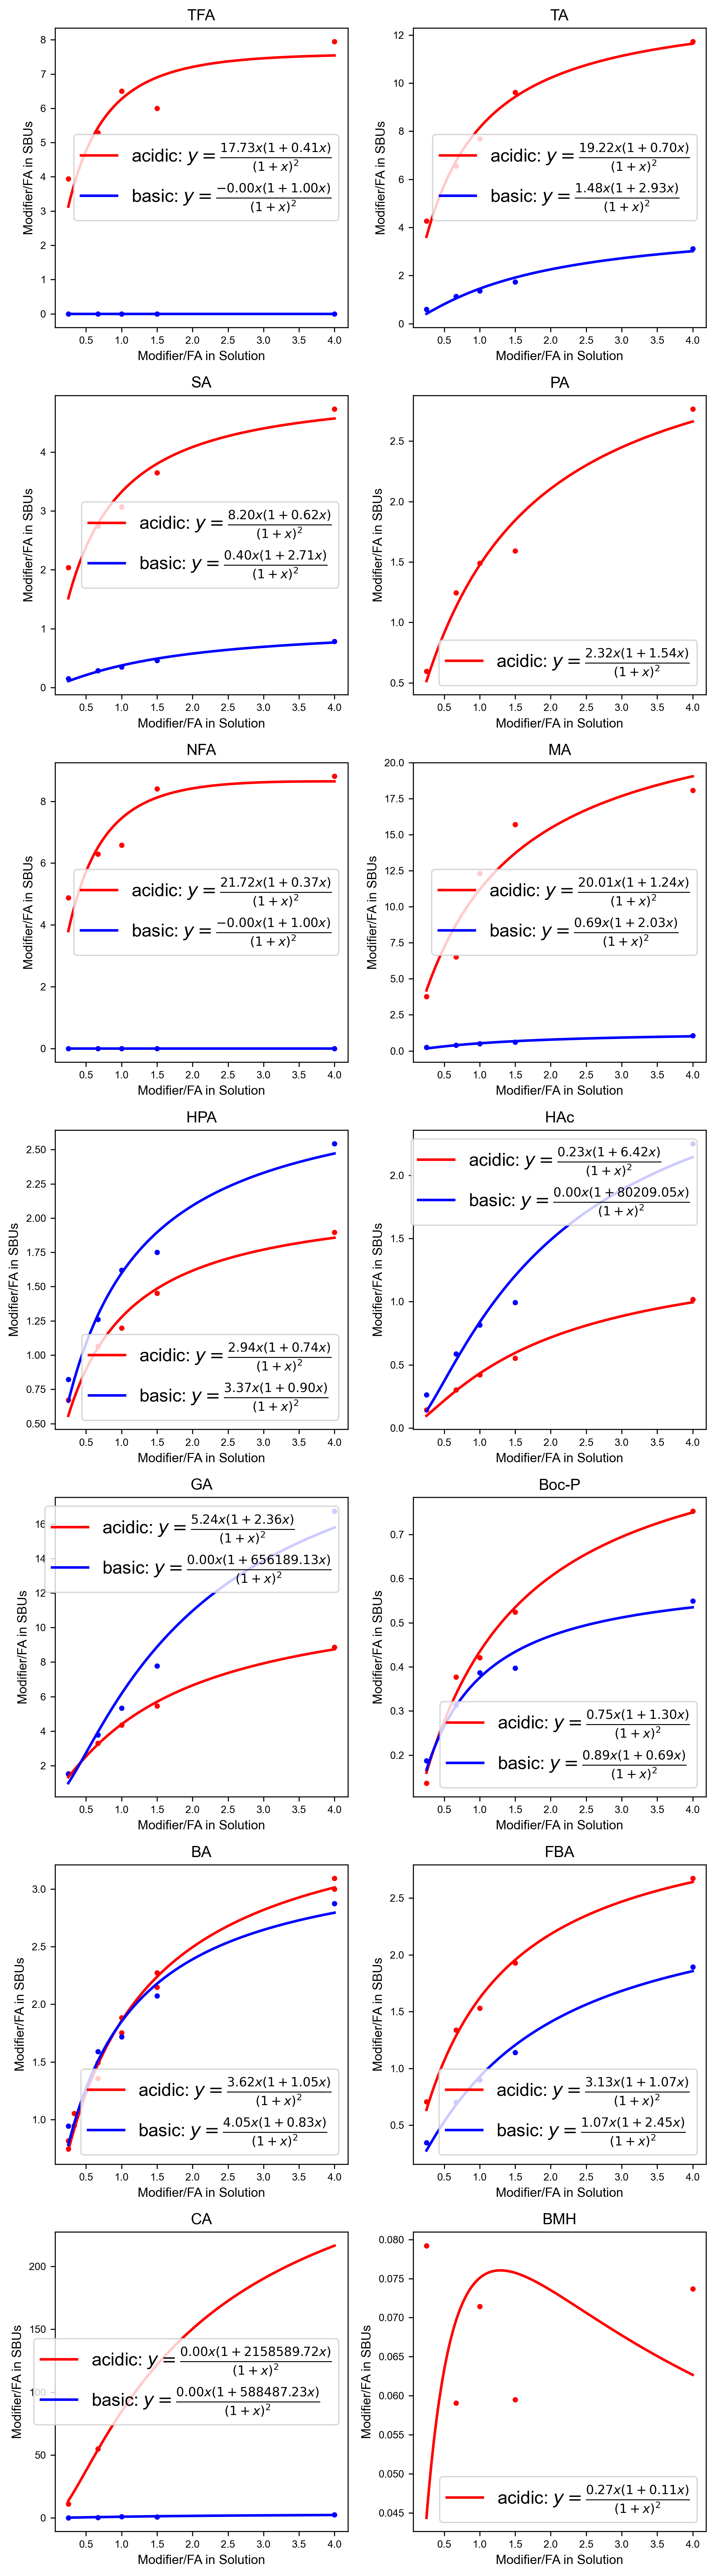

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# --- New fitting function ---
def adsorption_ratio(x, K, beta):
    x = np.asarray(x, dtype=float)
    return (K * x * (1 + beta * x)) / ((1 + x)**2)

def fit_adsorption_ratio(xdata, ydata, p0=(1.0, 1.0)):
    x = np.asarray(xdata, dtype=float)
    y = np.asarray(ydata, dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 2:
        raise ValueError("Not enough finite points to perform the fit.")
    
    # Bounds: K free, beta >= 0
    popt, pcov = curve_fit(
        adsorption_ratio,
        x[mask],
        y[mask],
        p0=p0,
        bounds=([-np.inf, 0], [np.inf, np.inf]),
        maxfev=10000
    )
    return popt, pcov

# --- Plotting ---
summary = []
color = ["red", "blue"]

n_cols = 2
n_rows = int(np.ceil(len(unique_acid) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 4 * n_rows), dpi=300)
axes = axes.flatten()

for idx, acid_temp in enumerate(unique_acid):
    df_by_acid = df.loc[df["Acid"] == acid_temp]
    ax = axes[idx]
    ax.set_title(acid_temp)
    count = 0 
    
    for experiment_type in df_by_acid["Experiment"].unique():
        try:
            this_curve = df_by_acid.loc[df_by_acid["Experiment"] == experiment_type]
            x = this_curve["Acid conc (mM)"] / this_curve["FA conc (mM)"]
            y = this_curve["acid/SBU"] / this_curve["FA/SBU"]
            
            popt = fit_adsorption_ratio(x.values, y.values)[0]
            
            x_fit = np.linspace(np.nanmin(x), np.nanmax(x), 300)
            y_fit = adsorption_ratio(x_fit, *popt)
            
            # Format the new equation nicely
            K_fit, beta_fit = popt
            equation_str = (
                f"$y = \\frac{{{K_fit:.2f}x(1+{beta_fit:.2f}x)}}{{(1+x)^2}}$"
            )

            # Plot
            ax.plot(x_fit, y_fit, linewidth=2, 
                    label=f"{experiment_type}: {equation_str}", 
                    c=color[count % len(color)])
            ax.scatter(x, y, color=color[count % len(color)], s=10)
            count += 1
        except Exception as e:
            print(f"Error with {acid_temp}, {experiment_type}: {e}")
            count += 1

    ax.set_xlabel('Modifier/FA in Solution')
    ax.set_ylabel('Modifier/FA in SBUs')
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=8)

# Hide unused subplots
for i in range(len(unique_acid), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
